## Usage of PyCupid Interfaces of Cupid's Clumping Algorithms

In [18]:
from pycupid import clumpfind, fellwalker, reinhold, gaussclumps
from astropy.io import fits
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt

def estimate_rms(data):
    """
    Computes RMS value of an N-dimensional numpy array
    """

    if isinstance(data, ma.MaskedArray):
        ret = np.sum(data*data) / (np.size(data) - np.sum(data.mask)) 
    else: 
        ret = np.sum(data*data) / np.size(data)
    return np.sqrt(ret)

def load_data(fits_path):
    hdulist = fits.open(fits_path)
    data = hdulist[0].data
    # droping out the stokes dimension
    data = np.ascontiguousarray(data[0])
    
    # in case NaN values exist on cube
    mask = np.isnan(data)
    if np.any(mask): data = ma.masked_array(data, mask=mask)

    # map to 0-1 intensity range
    data -= data.min()
    data /= data.max()
    
    if data.shape[0]==1:
        data = np.ascontiguousarray(data[0])
        if np.any(mask): 
            mask = np.ascontiguousarray(mask[0])
            data = ma.masked_array(data, mask=mask)
    return data

### Loading FITS data

In [13]:
data = load_data('Orion.cont.image.fits')
rms = estimate_rms(data)

### GaussClump

In [40]:
out_gc = gaussclumps(data, 0.5*rms)

In [41]:
out_gc[out_gc==out_gc.min()] = 0.

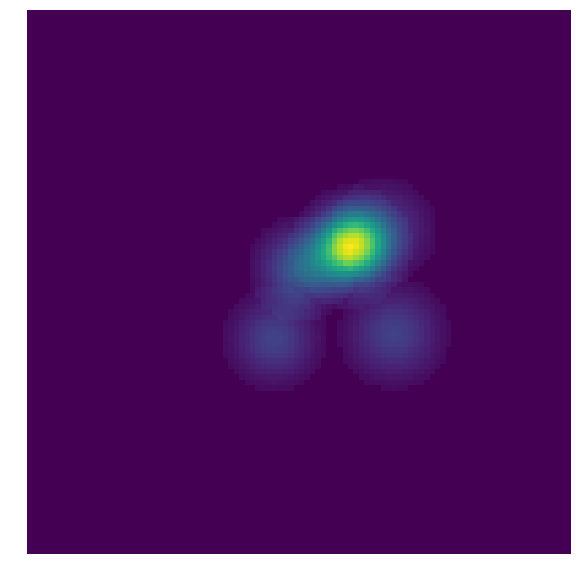

In [42]:
plt.figure(figsize=(10,10))
plt.imshow(out_gc)
plt.axis('off')
plt.show()

### ClumpFind

In [22]:
out_cf = clumpfind(data, 0.5*rms)

In [23]:
out_cf[out_cf==out_cf.min()] = 0.

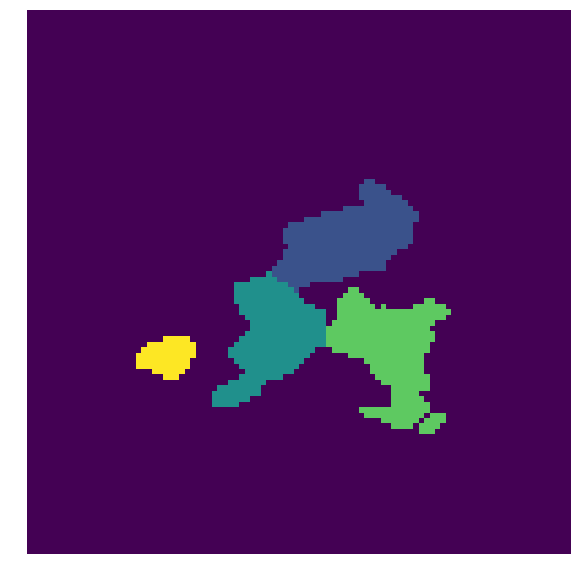

In [24]:
plt.figure(figsize=(10,10))
plt.imshow(out_cf)
plt.axis('off')
plt.show()

### FellWalker

In [28]:
out_fw = fellwalker(data, 0.5*rms)

In [29]:
out_fw[out_fw==out_fw.min()] = 0.

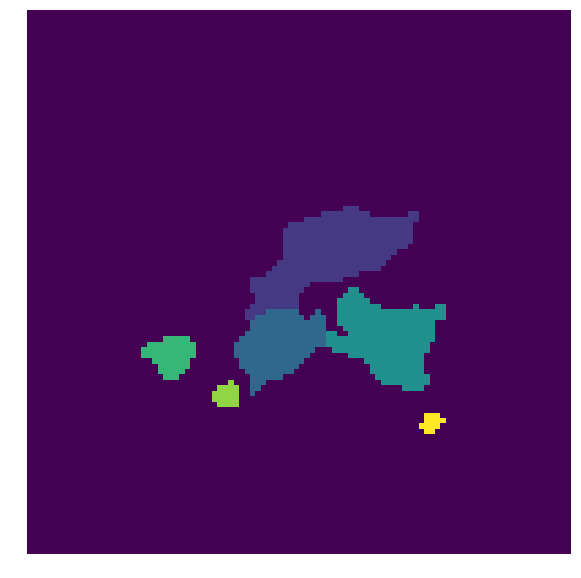

In [30]:
plt.figure(figsize=(10,10))
plt.imshow(out_fw)
plt.axis('off')
plt.show()

### Reinhold

In [35]:
out_rh = reinhold(data, 0.5*rms)

In [37]:
out_rh[out_rh==out_rh.min()] = 0.

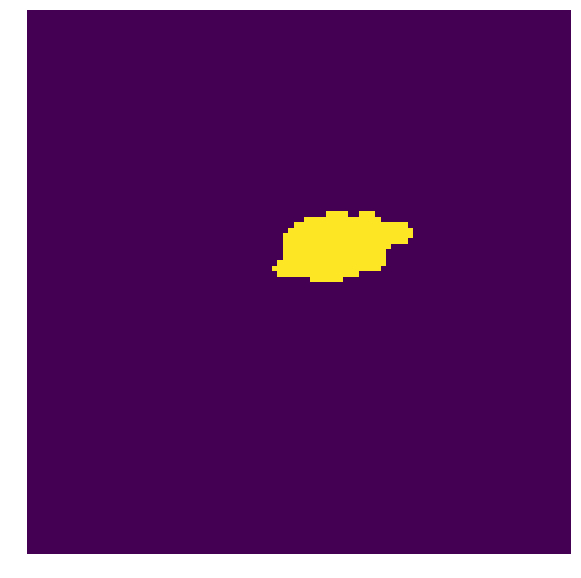

In [38]:
plt.figure(figsize=(10,10))
plt.imshow(out_rh)
plt.axis('off')
plt.show()